In [8]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../src')

import SRRS
from SRRS import plotting

##  Going to visualize Puncta distributions and make sure the score "feels" good

In [4]:
gc_df = pd.read_csv('../outputs/gene_cell/MOp_punctate.csv')
gc_df.head()

,metric,cell_id,ontology,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id
0,punctate,100019614084014214413331344619872059390,L45_IT_1,113,Adam2,1,20.0,0.660714,0.339286,2,1,1,m2s1
1,punctate,100019614084014214413331344619872059390,L45_IT_1,113,Ano4,1,23.0,0.607143,0.339286,2,1,1,m2s1
2,punctate,100019614084014214413331344619872059390,L45_IT_1,113,Bcl11b,1,27.0,0.535714,0.339286,2,1,1,m2s1
3,punctate,100019614084014214413331344619872059390,L45_IT_1,113,Brinp3,1,11.0,0.821429,0.339286,2,1,1,m2s1
4,punctate,100019614084014214413331344619872059390,L45_IT_1,113,C1ql3,3,93.0,-0.642857,0.199936,2,1,1,m2s1


In [7]:
extreme_gcs = gc_df[
    gc_df['num_gene_spots'].ge(20) &
    gc_df['num_spots'].ge(500) &
    gc_df['score'].abs().ge(0.8)
]
extreme_gcs

,metric,cell_id,ontology,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id
19578,punctate,104659186418503535470817960065546810084,unannotated,1086,Rgs6,21,981.0,-0.806452,0.042755,2,1,1,m2s1
94170,punctate,123550968191146599779479647314265531701,unannotated,1738,Pou3f1,21,1605.0,-0.846862,0.043027,2,1,1,m2s1
104714,punctate,126285130233938666944226974977511873709,L5_ET_2,1575,Unc5b,20,108.0,0.864041,0.042822,2,1,1,m2s1
171874,punctate,144378240430793763721183207823287112976,unannotated,731,Shisa9,21,665.0,-0.819178,0.042403,2,1,1,m2s1
217181,punctate,155805641862597770356803884304258427938,L6_IT_Car3,1171,Col24a1,25,103.0,0.825641,0.036339,2,1,1,m2s1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312326,punctate,3490337361030950110680974631488775673,unannotated,994,Dscaml1,22,905.0,-0.820745,0.039091,1,1,1,m1s1
21392455,punctate,52672027072792615010946348490732078145,unannotated,732,Unc5b,28,679.0,-0.854993,0.031080,1,1,1,m1s1
21438072,punctate,63056062600846522641620599669191356634,L6_IT_Car3,550,Tenm3,23,507.0,-0.843352,0.038537,1,1,1,m1s1
21446834,punctate,64820040928057907718786042700534656002,unannotated,652,Slc30a3,24,596.5,-0.829493,0.035728,1,1,1,m1s1


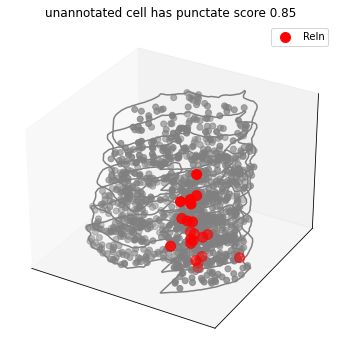

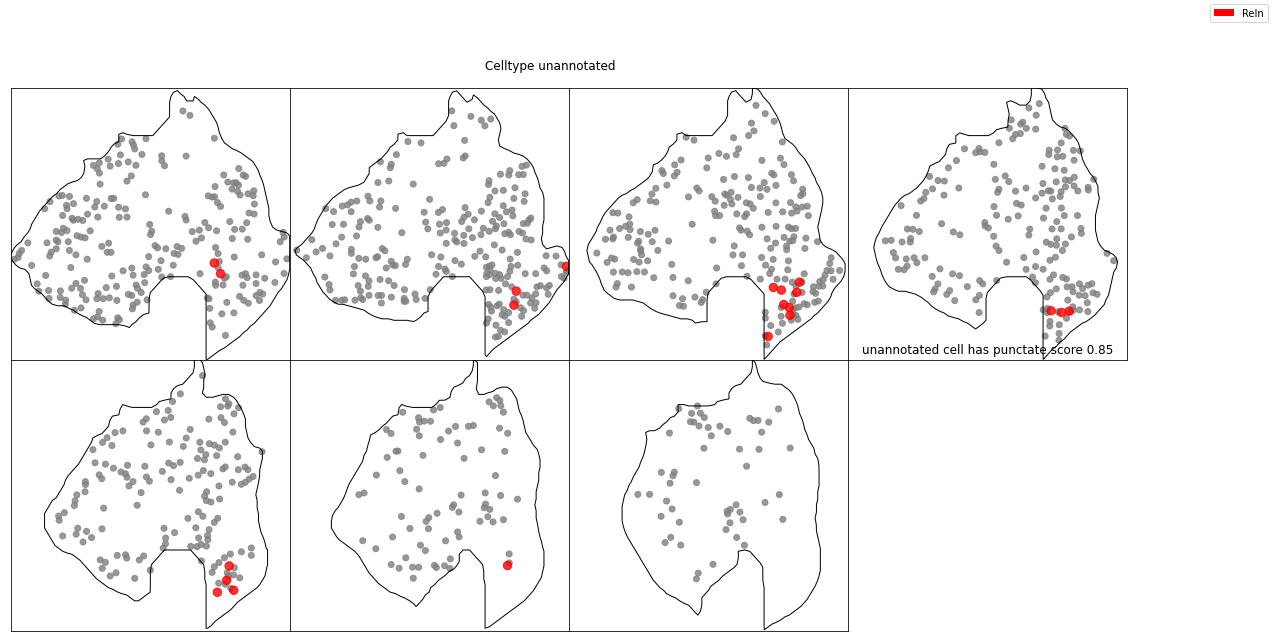

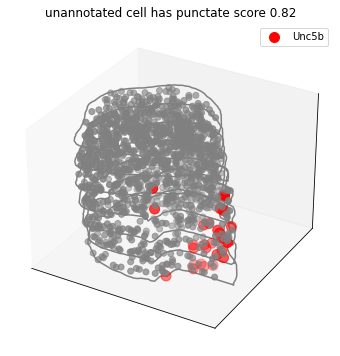

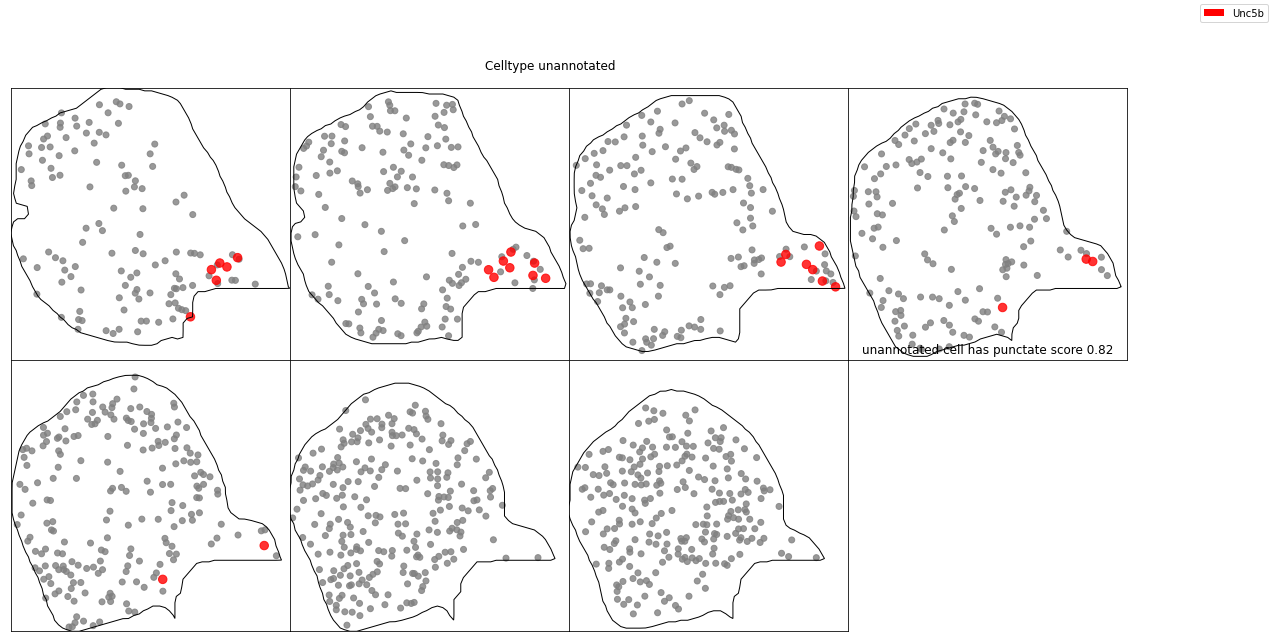

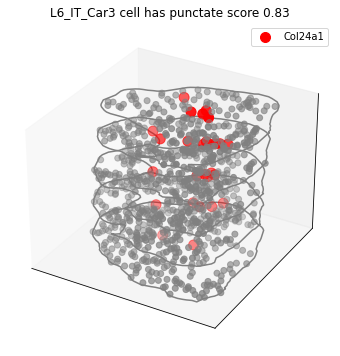

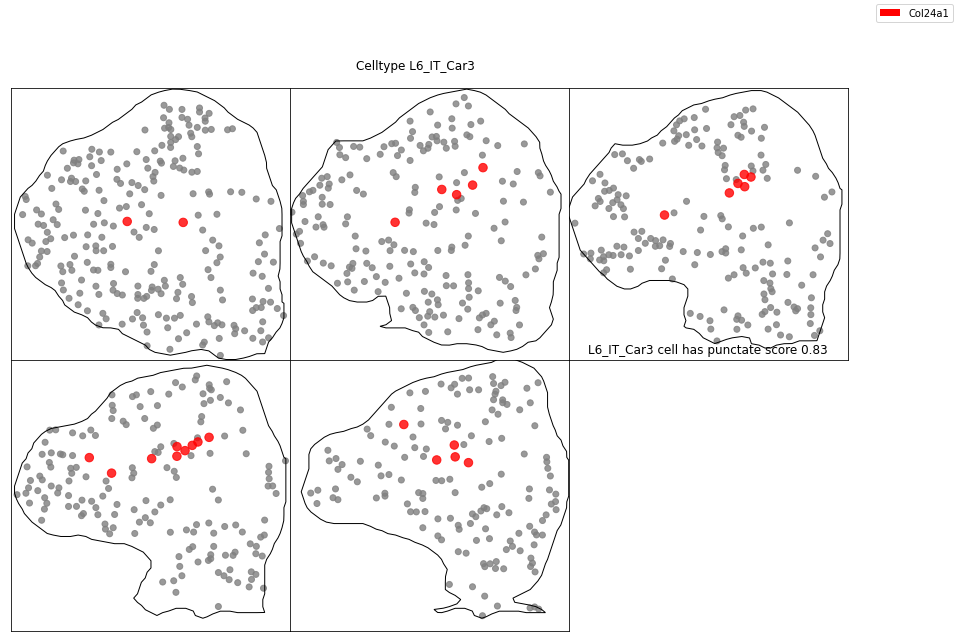

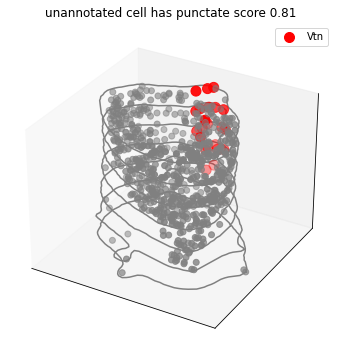

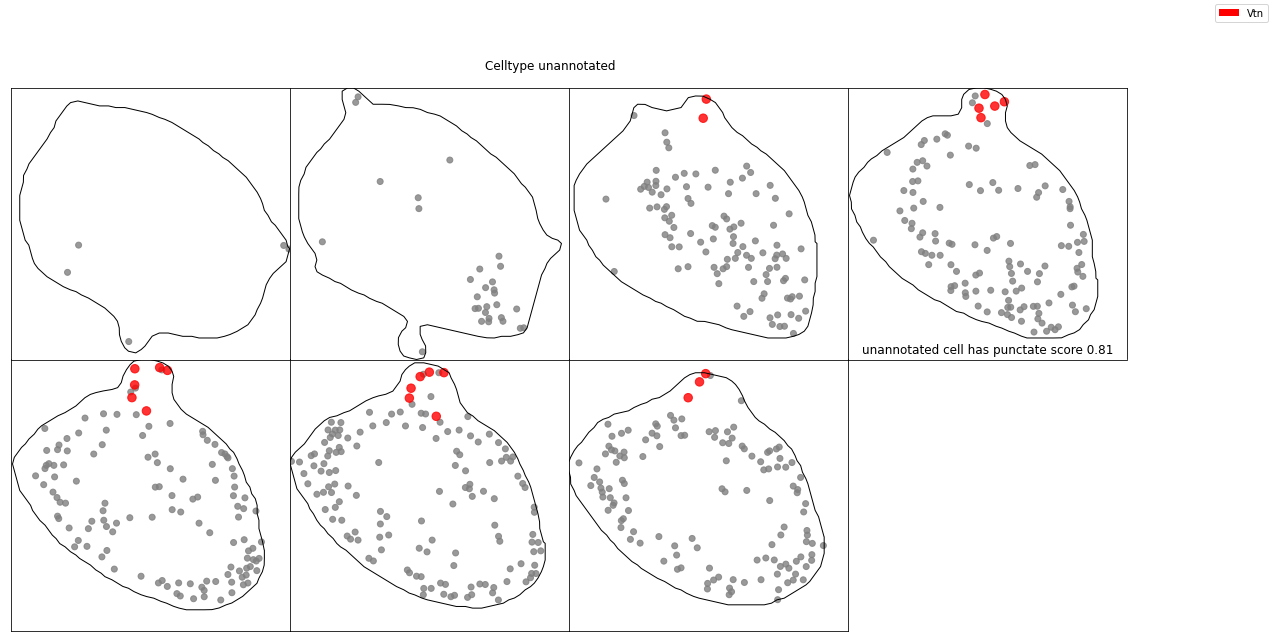

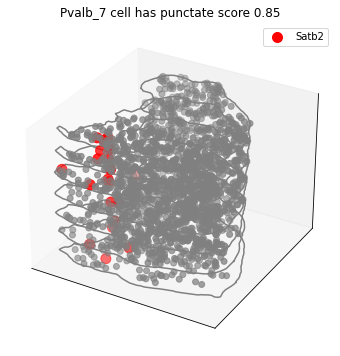

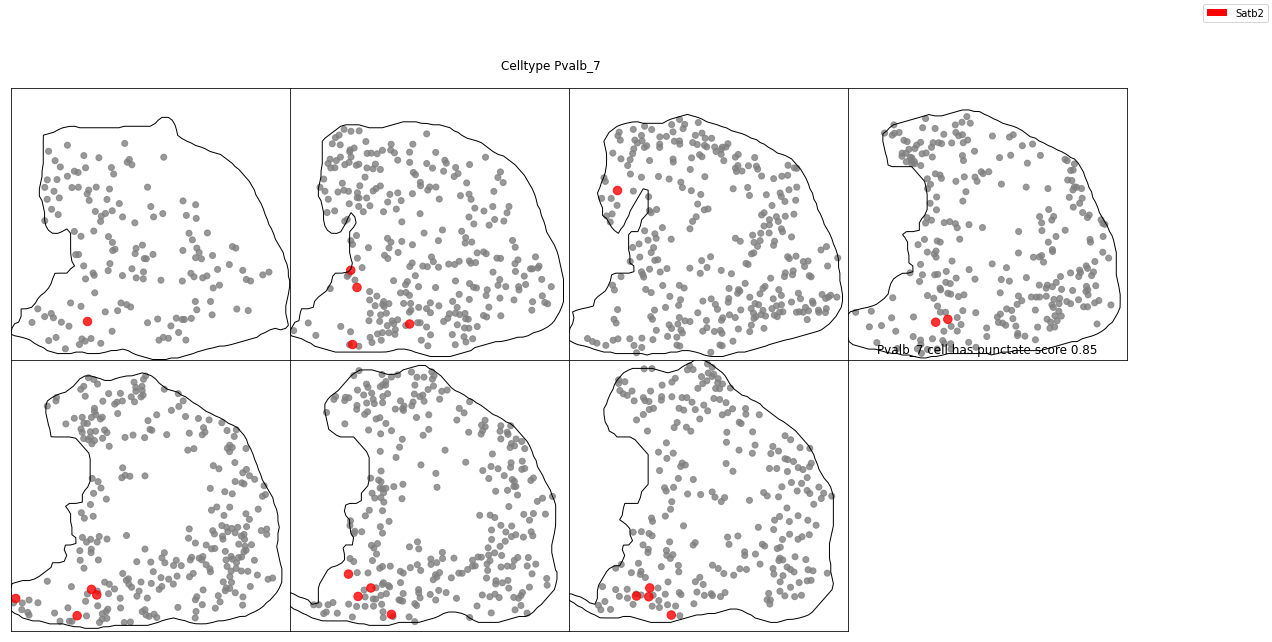

In [27]:
#Plotting very punctate scoring cells

num_plots = 5
for i,r in extreme_gcs[extreme_gcs['score'].gt(0)].sample(5).iterrows():
    h5_path = '../inputs/mouse{}sample{}.hdf5'.format(r['mouse'],r['sample'])
    sample = SRRS.HDF5(h5_path)
    cell = sample.get_cells_by_id(r['cell_id'])[0]
    
    #3D plot
    fig = plotting.plot_cell_3D(cell, {r['gene']:'red'})
    plt.title('{} cell has punctate score {:.2f}'.format(r['ontology'],r['score']))
    plt.show()
    plt.close()
    
    #2D plot
    fig = plotting.plot_cell_zslices(cell, {r['gene']:'red'})
    plt.title('{} cell has punctate score {:.2f}'.format(r['ontology'],r['score']))
    plt.show()
    plt.close()


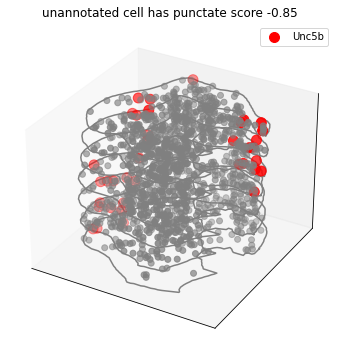

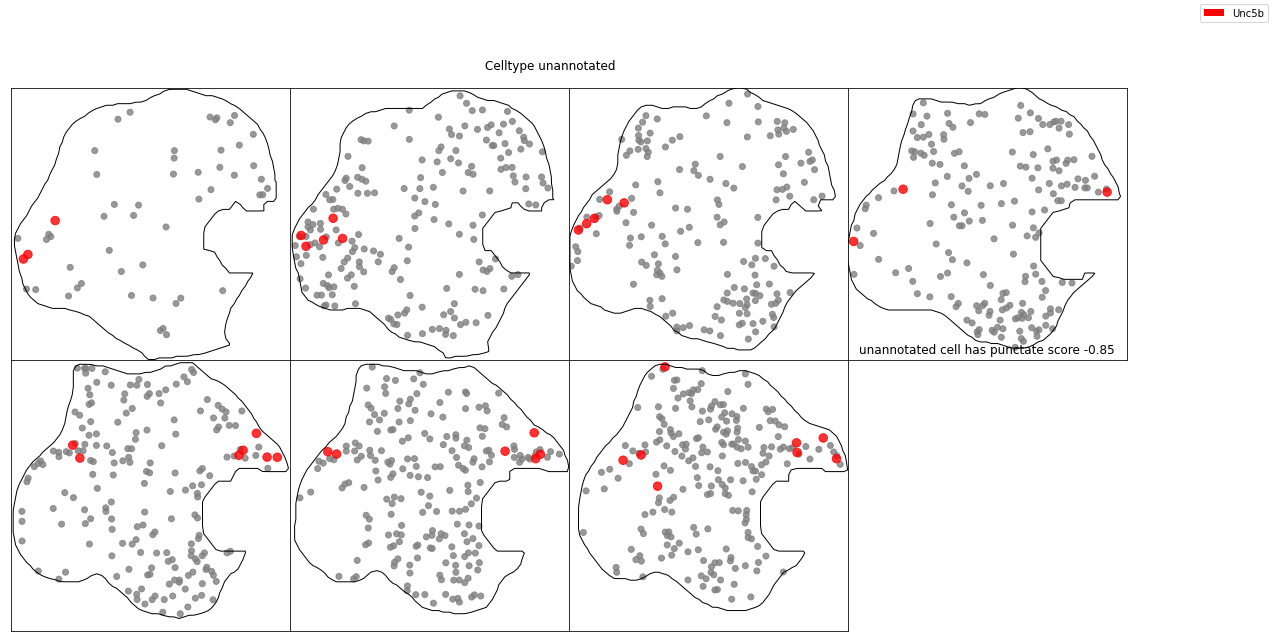

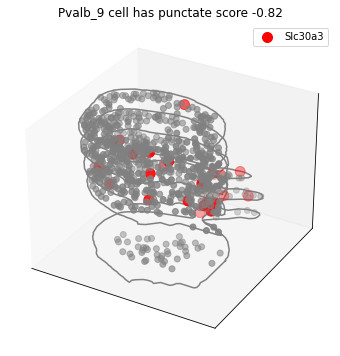

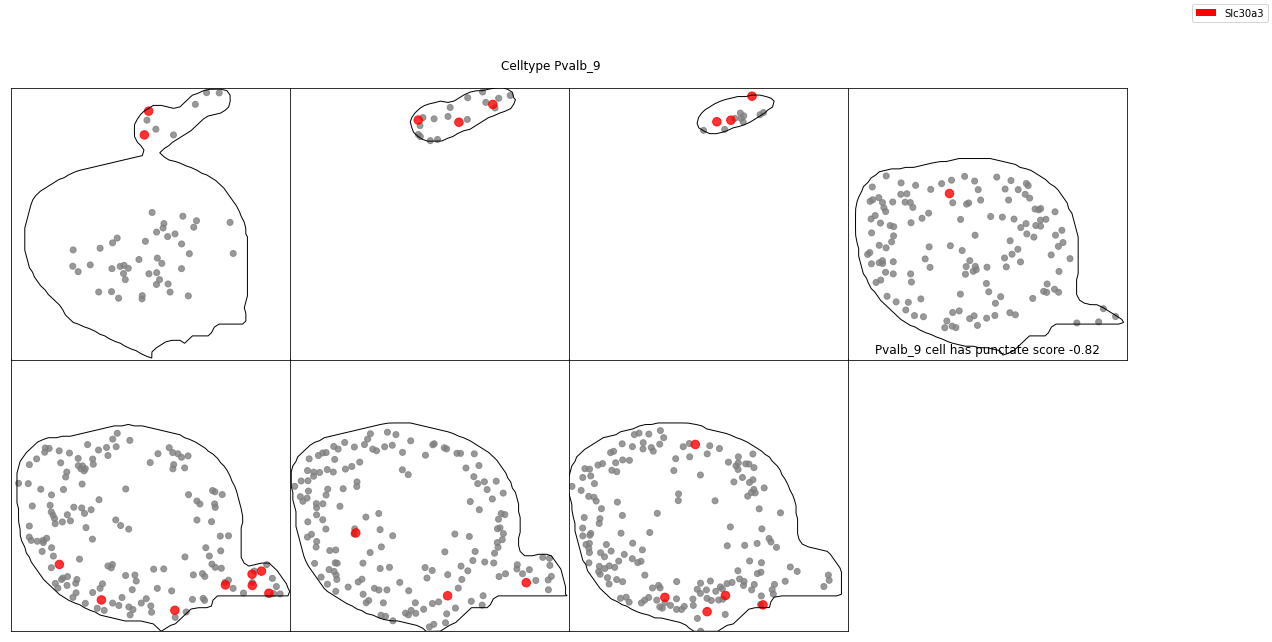

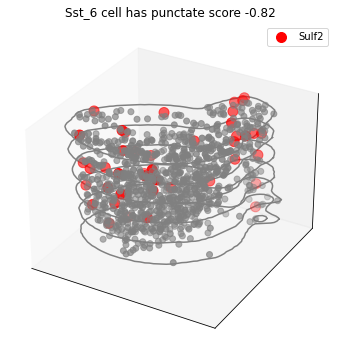

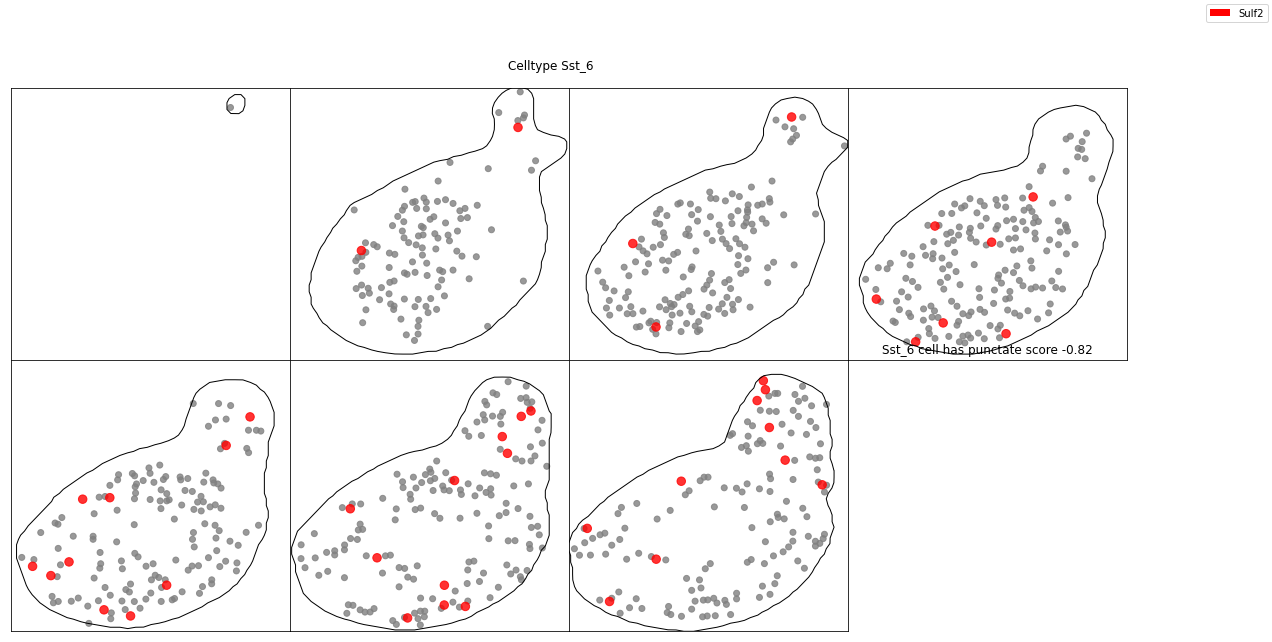

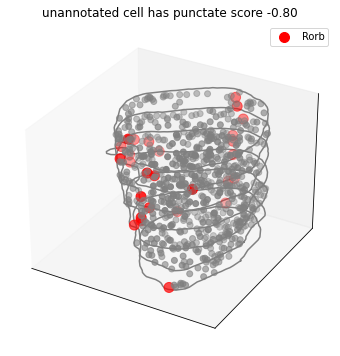

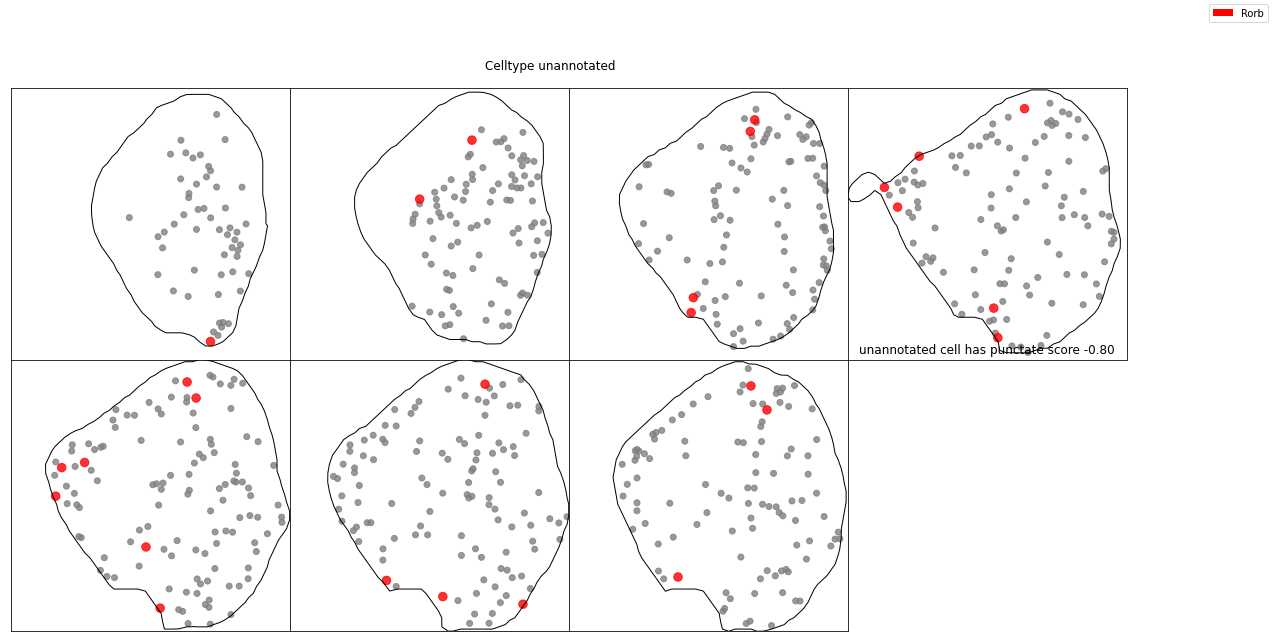

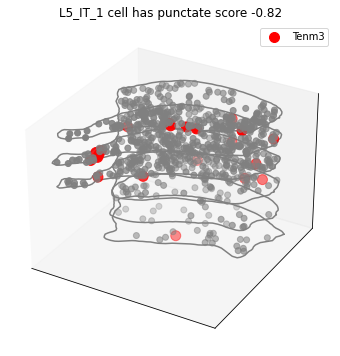

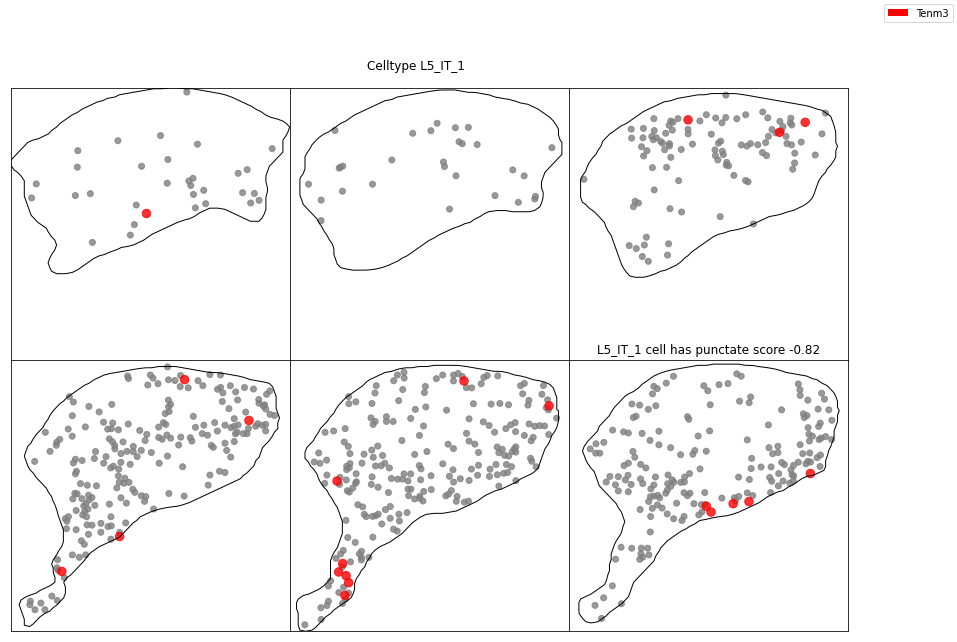

In [28]:
#Plotting very anti-punctate scoring cells

num_plots = 5
for i,r in extreme_gcs[extreme_gcs['score'].lt(0)].sample(5).iterrows():
    h5_path = '../inputs/mouse{}sample{}.hdf5'.format(r['mouse'],r['sample'])
    sample = SRRS.HDF5(h5_path)
    cell = sample.get_cells_by_id(r['cell_id'])[0]
    
    #3D plot
    fig = plotting.plot_cell_3D(cell, {r['gene']:'red'})
    plt.title('{} cell has punctate score {:.2f}'.format(r['ontology'],r['score']))
    plt.show()
    plt.close()
    
    #2D plot
    fig = plotting.plot_cell_zslices(cell, {r['gene']:'red'})
    plt.title('{} cell has punctate score {:.2f}'.format(r['ontology'],r['score']))
    plt.show()
    plt.close()


# Merge the puncta outputs to get a gene_cell level table

In [15]:
punctate_paths = {
    ('Viz',1,1,1,'S1R1','../Slice1_Replicate1_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,1,2,'S1R2','../Slice1_Replicate2_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,1,3,'S1R3','../Slice1_Replicate3_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,2,1,'S2R1','../Slice2_Replicate1_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,2,2,'S2R2','../Slice2_Replicate2_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,2,3,'S2R3','../Slice2_Replicate3_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,3,1,'S3R1','../Slice3_Replicate1_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,3,2,'S3R2','../Slice3_Replicate2_subset_zslices_reformat_punctate.csv'),
    ('Viz',1,3,3,'S3R3','../Slice3_Replicate3_subset_zslices_reformat_punctate.csv'),
    ('MOp',1,1,1,'m1s1','../mouse1sample1_punctate.csv'),
    ('MOp',1,2,1,'m1s2','../mouse1sample2_punctate.csv'),
    ('MOp',1,3,1,'m1s3','../mouse1sample3_punctate.csv'),
    ('MOp',1,4,1,'m1s4','../mouse1sample4_punctate.csv'),
    ('MOp',1,5,1,'m1s5','../mouse1sample5_punctate.csv'),
    ('MOp',1,6,1,'m1s6','../mouse1sample6_punctate.csv'),
    ('MOp',2,1,1,'m2s1','../mouse2sample1_punctate.csv'),
    ('MOp',2,2,1,'m2s2','../mouse2sample2_punctate.csv'),
    ('MOp',2,3,1,'m2s3','../mouse2sample3_punctate.csv'),
    ('MOp',2,4,1,'m2s4','../mouse2sample4_punctate.csv'),
    ('MOp',2,5,1,'m2s5','../mouse2sample5_punctate.csv'),
    ('MOp',2,6,1,'m2s6','../mouse2sample6_punctate.csv'),
    ('Seq',1,1,1,'SeqFish+','../seqfish_plus_punctate.csv'),
}

path_df = pd.DataFrame(
    data=punctate_paths,
    columns=['dataset','mouse','sample','replicate','sample_id','path'],
)
path_df

,dataset,mouse,sample,replicate,sample_id,path
0,Viz,1,3,2,S3R2,../Slice3_Replicate2_subset_zslices_reformat_p...
1,Viz,1,2,1,S2R1,../Slice2_Replicate1_subset_zslices_reformat_p...
2,Seq,1,1,1,SeqFish+,../seqfish_plus_punctate.csv
3,Viz,1,1,2,S1R2,../Slice1_Replicate2_subset_zslices_reformat_p...
4,MOp,2,1,1,m2s1,../mouse2sample1_punctate.csv
5,Viz,1,3,1,S3R1,../Slice3_Replicate1_subset_zslices_reformat_p...
6,MOp,2,6,1,m2s6,../mouse2sample6_punctate.csv
7,Viz,1,3,3,S3R3,../Slice3_Replicate3_subset_zslices_reformat_p...
8,Viz,1,2,3,S2R3,../Slice2_Replicate3_subset_zslices_reformat_p...
9,MOp,2,2,1,m2s2,../mouse2sample2_punctate.csv


In [18]:
#Read in and concatenate the outputs from each dataset together
for dataset,g in path_df.groupby('dataset'):
    print(dataset)
    df = pd.DataFrame()
    for i,r in g.iterrows():
        sub_df = pd.read_csv(r['path'])
        sub_df['mouse'] = r['mouse']
        sub_df['sample'] = r['sample']
        sub_df['replicate'] = r['replicate']
        sub_df['sample_id'] = r['sample_id']
        df = pd.concat((df,sub_df))
    
    df = df.rename(columns={'annotation':'ontology'})
    df.to_csv('../outputs/gene_cell/{}_punctate.csv'.format(dataset),index=None)
    

MOp
Seq
Viz
